# L'extension [scikit-learn](https://scikit-learn.org/stable/index.html) pour l'apprentissage automatique

L'extension [scikit-learn](https://scikit-learn.org/stable/index.html) permet de faire de l'apprentissage automatique, appelé *machine learning* en anglais. L'apprentissage automatique regroupe les méthodes qui construisent des modèles de prédiction à partir de données.

[L'introduction de ce module](https://scikit-learn.org/stable/tutorial/basic/tutorial.html) donne le vocabulaire qu'il faut connaître pour ce domaine.

Les apprentissages automatiques se divisent en deux catégories principales :

- l'apprentissage supervisé (*supervised learning*) pour lequel une première phase va construire un modèle à partir de données dont on connait le résultat
- l'apprentissage non-supervisé (*unsupervised learning*) dans lequel on demandera à la machine de trouver par elle même des caractéristiques intéressantes dans le jeu de données.

Ces notes reprennent les exemple qui sont présentés sur l'excellent tutoriel de [machine learnia](https://www.youtube.com/watch?v=P6kSc3qVph0&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=20) et qui montre une utilisation progressive des concepts les plus ellaborés de [scikit-learn](https://scikit-learn.org/stable/index.html).


# Un premier exemple d'apprentissage avec les régressions

Le module scikit-learn propose un module de régression linéaire. La régression est un premier exemple où à partir de donnée : on détermine un modèle qui est l'équation de la droite de régression recherchée et qui permettra ensuite de faire des prédictions sur des nouvelles données.

Nous construisons ici un jeu de données pour y appliquer ensuite une regression linéaire. Il s'agit finalement d'un apprentissage supervisé élémentaire : à partir d'un jeu de données, on passe par une phase d'apprentissage qui va calculer la droite ou la courbe de regression, qui sera finalement le modèle qui servira plus tard à faire des prédictions.

Dans tous ces exemples, lLa notation sera toujours la suivante:
- `X` : la matrice donnant le jeu de données
- `y` : le vecteur des résultats attendus pour le jeu de test

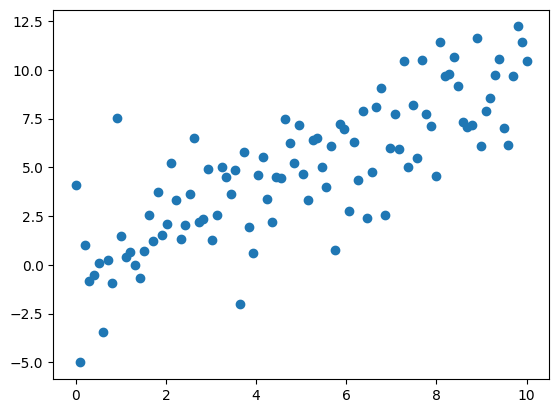

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(0)
# y = X + np.random.randn(m, 1)

rng = np.random.default_rng(3)  # le générateur de nombre aléatoire
m = 100
X = np.linspace(0, 10, m).reshape(m,1) # attention de bien avoir une matrice
# y = X + 5 * rng.random(m).reshape(m,1)
# y = X + rng.uniform(-3, 3, m).reshape(m,1)
y = X + rng.normal(0, 2, m).reshape(m,1)

plt.scatter(X, y)
plt.show()

La résolution avec *scikit-learn* passera toujours par les phases suivantes :

```python
model = linearRegression(...) # déclaration du modèle et de sa méthode
model.fit(X,y)                # entraînement du modèle
model.score(X,y)              # estimation de la précision du modèle
model.predict(X)              # prédiction à partir du modèle
```

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.6451616159546059

Dans notre cas, nous allons utiliser les prédictions pour construire la droite de régression linéaire.

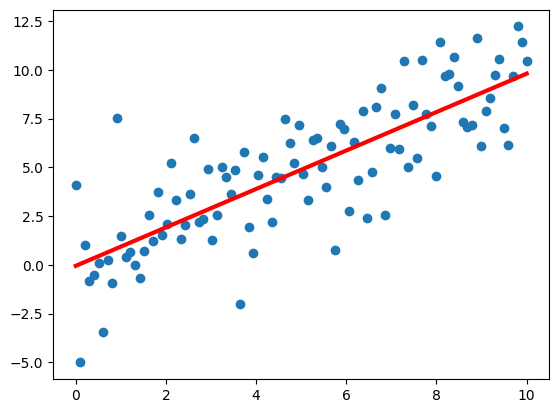

In [16]:
plt.scatter(X, y)
plt.plot(X, model.predict(X), c='red', lw=3)
plt.show()

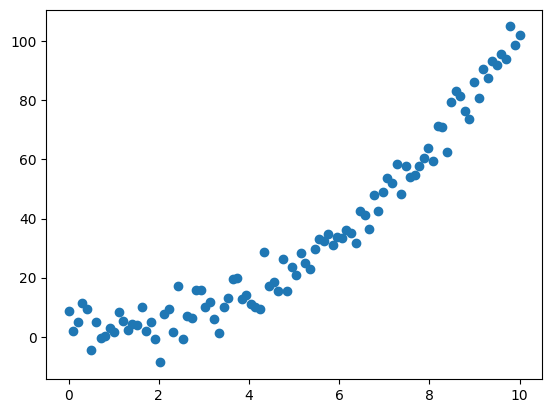

In [14]:
np.random.seed(0)
m = 100 # creation de 100 échantillons
X = np.linspace(0, 10, m).reshape(m,1) # attention de bien avoir une matrice
y = X**2 + 5*np.random.randn(m, 1)
plt.scatter(X, y)
plt.show()

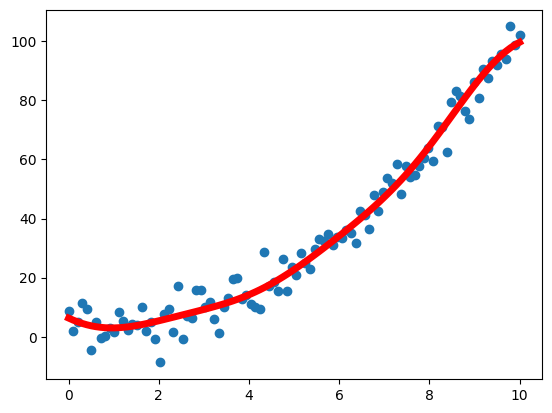

In [15]:
from sklearn.svm import SVR
model = SVR(C=100)
y = y.ravel()  # ici y doit être une liste simple
model.fit(X, y)
model.score(X, y)
model.fit(X, y)
model.score(X, y)

prediction = model.predict(X)

plt.scatter(X,y)
plt.plot(X, prediction, lw=5, c='r')
plt.show()

# Exemple de classification

Nous utilisons les données sur les passagers du titanic pour déterminer la chance qu'on aurait eu de survivre dans le naufrage du titanic.

Pour cela on va charge les données sur le titanic, qui sont disponibles dans l'extension seaborn et on effecture un premier filtrage.

Pour on remplace aussi les catégories *male/female* par des entiers 0/1.

In [16]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


On choisit une méthode de recherche dans scikit-learn, ici le [méthode des plus proches voisins](https://scikit-learn.org/stable/modules/neighbors.html) et on définit donc un notre modèle avec [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

Les étiquettes `y` utilisées pour la phase d'apprentissage sera la colonne `survived` et les données `X` sur lesquelles on veut faire l'apprentissage sont toutes les autres colonnes.

On extrait donc la colonne `survived` et on la supprime du jeu de données avec la méthode [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) utilisée ici selon les colonnes, donc avec `axis=1`.


In [18]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)
X.head()

,pclass,sex,age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0


On applique donc les étiquettes `y` visées à notre jeu de données `X` à notre modèle avec la méthode `fit` et on regarde le score de notre estimation.

Attention, comme nous allons ensuite utiliser des `ndarray`, il faut transformer le `dataframe` en `ndarray` dans le modèle ce qui se fait avec la méthode [to_numpy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) (qui remplace la méthode [values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.values.html)).

In [19]:
model.fit(X.to_numpy(),y)
model.score(X.to_numpy(),y)

0.8305322128851541

In [20]:
import numpy as np

def survie(model, pclass=3, sex=0, age=26):
    x = np.array([pclass, sex, age]).reshape(1,3)
    # ne pas oublier de transformer la ligne simple en tableau de une ligne
    print(model.predict(x))
    print(f'chance de survie : {100*model.predict_proba(x)[0][1]:.0f}%')
    # print(model.predict_proba(x)[0][0])

survie(model, pclass=1, sex=0, age=50)

[0]
chance de survie : 40%


## Optimisation du modèle

On peut améliorer le modèle avec le paramètre `n_neighbors` qui détermine le nombre de voisins à considérer. Nous lançons des modélisations et retiendrons celui qui aura la plus grande efficacité.

Je sauvegarde les résultats dans une liste, ce qui me permet aussi de voir la tendance.

In [22]:
max=0
N = range(1,20)
score = []
for nb in N:
    model = KNeighborsClassifier(n_neighbors=nb)
    model.fit(X.to_numpy(),y)   # X.values transform dataframe into ndarrays
    SCR = model.score(X.to_numpy(),y)
    score.append(SCR)
    if SCR > max:
        max = SCR
        nb_max = nb

print(f'meilleur résultat pour n_neighbors={nb_max}')

meilleur résultat pour n_neighbors=4


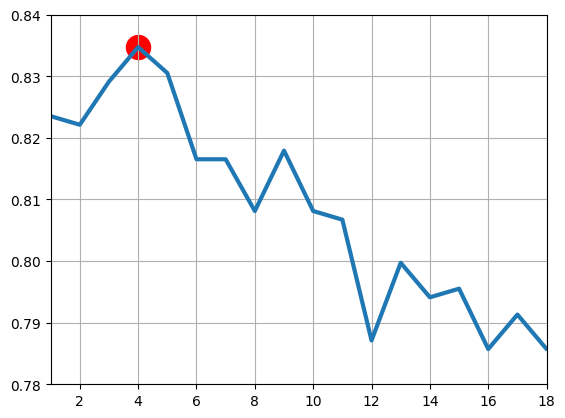

In [10]:
import matplotlib.pyplot as plt

plt.plot(range(1,20), score, lw=3)
plt.scatter(nb_max, max, s=300, c='red')
# ax = plt.gca()
plt.grid(visible=True)
plt.axis([1,18, 0.78, 0.84], emit=True, )
plt.show()

On retient donc qu'il faut considérer 4 voisins pour avoir le meilleur résultat.

In [23]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X.to_numpy(),y)
survie(model, pclass=1, sex=0, age=26)

[1]
chance de survie : 100%


# Le jeu d'apprentissage et le jeu de test

La validation du modèle ne peut pas se faire sur le même jeu de données que celui ayant servi à l'apprentissage : le score obtenu serait faussement bon ! Il faut donc séparer son jeu de données entre une part servant à l'apprentissage et l'autre servant ensuite à tester le modèle, typiquement 80% et 20% pour le second.

À partir d'un jeu de données $(X,y)$ on sépare donc un jeu $(X_{train}, y_{train})$ pour lui appliquer la méthode `fit` et un jeu de données $(X_{test}, y_{test})$ pour vérifier avec `score`.

Dans le module [model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) on va utiliser la fonction [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split).

Nous allons experimenter sur le data set des fleurs d'Iris.



In [159]:
import numpy as np
import matplotlib.pyplot as plt

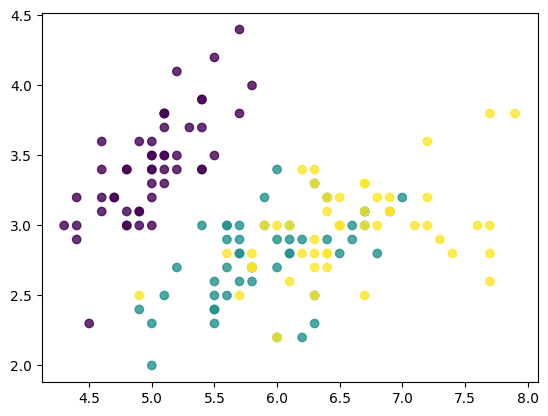

In [29]:
from sklearn.datasets import load_iris
iris = load_iris()
X=iris.data
y=iris.target

plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8)
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=5)
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (120, 4)
Test set: (30, 4)


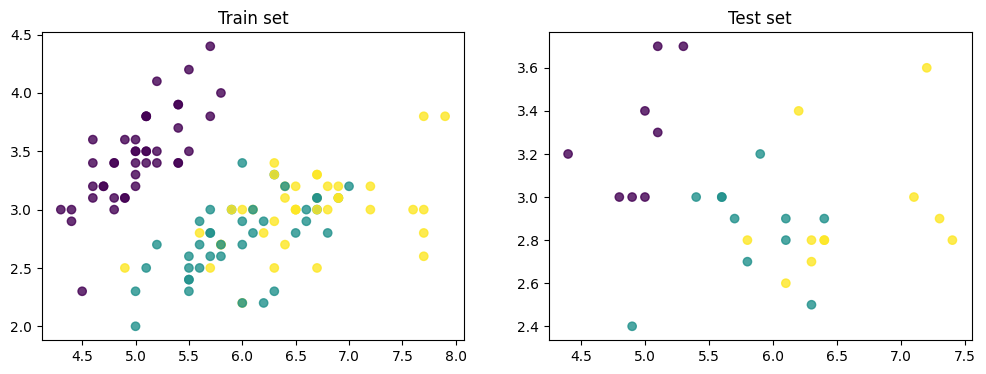

In [31]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)
plt.title('Test set')
plt.show()

In [32]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train, y_train)
print('précision du modèle:', model.score(X_test, y_test))

précision du modèle: 0.9666666666666667


## Les cross validations

La [cross validation](https://inside-machinelearning.com/cross-validation/) est un moyen de s'assurer que notre modèle est au maximum de ses capacités. Usuellement on partage le jeu de données en 5 sous-groupes, les quatres premiers servant à entraîner le modèle et on en retiendra celui qui aura obtenu le meilleur score. C'est la technique de *cross validation*.

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9833333333333334

On peut ensuite boucler pour trouver le meilleur hyperparamètre

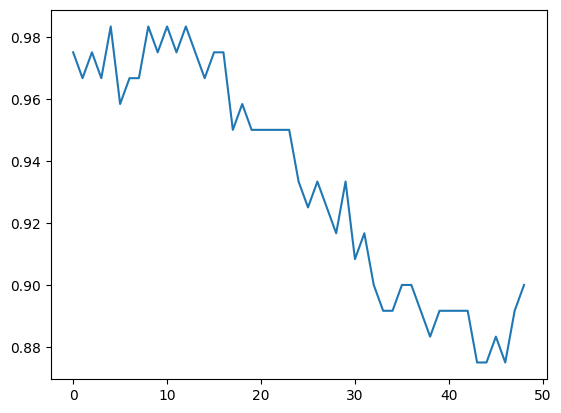

In [34]:
val_score=[]
for k in range(1,50):
    score=cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)
plt.show()

## Les courbes de validations



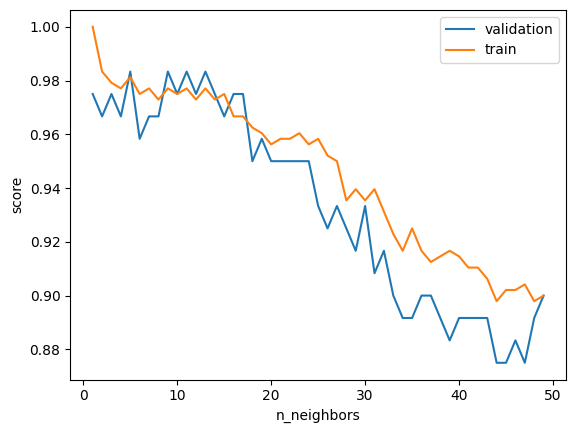

In [35]:
from sklearn.model_selection import validation_curve

model = KNeighborsClassifier()
k = np.arange(1,50)

train_score, val_score = validation_curve(model, X_train, y_train,
                                          param_name='n_neighbors', 
                                          param_range=k, 
                                          cv=5)
plt.plot(k, val_score.mean(axis=1),label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()


# Rechercher tous les meilleurs paramètres avec GridSearchCV

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid={'n_neighbors':np.arange(1,20),
            'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

0.9833333333333334
{'metric': 'euclidean', 'n_neighbors': 5}


In [37]:
model = grid.best_estimator_
model.score(X_test, y_test)

0.9333333333333333

# matrice de confusion



In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]])

# Les courbes d'apprentissage

Les courbes d'apprentissage montre la performance du modèle avec le croissance du nombre de données. En effet, au bout d'un certain temps, il n'est plus nécessaire d'avoir plus de données, car l'amélioration de la reconnaissance n'évolue plus beaucoup.

[ 9 19 28 38 48 57 67 76 86 96]


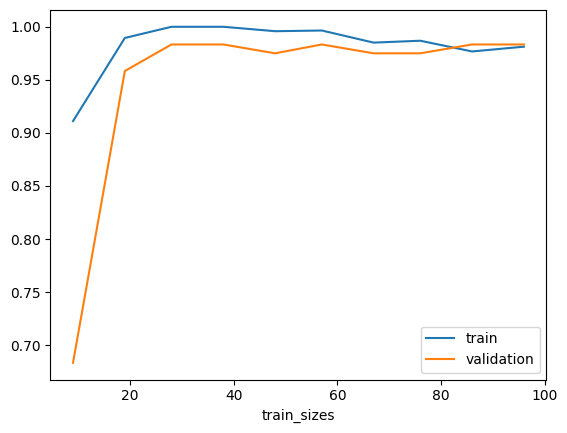

In [39]:
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model, X_train, y_train,
                                           train_sizes=np.linspace(0.1,1,10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N,val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

# On refait sur le titanic

In [57]:
titanic = sns.load_dataset('titanic')
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [ ]:
param_grid={'n_neighbors':np.arange(1,20),
            'metric': ['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

In [56]:
model = grid.best_estimator_

# model.fit(X.to_numpy(),y)
survie(model, pclass=1, sex=0, age=26)

ValueError: X has 3 features, but KNeighborsClassifier is expecting 4 features as input.

# Utilisation de [scikit-learn](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py) pour reconnaître l'écriture.

In [ ]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

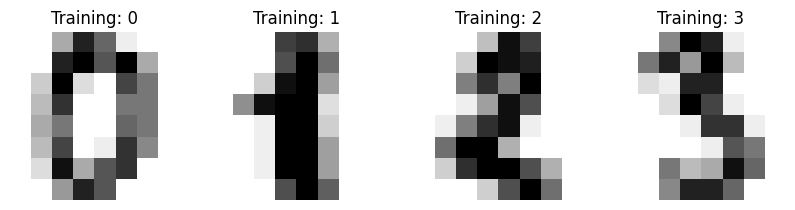

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)


In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

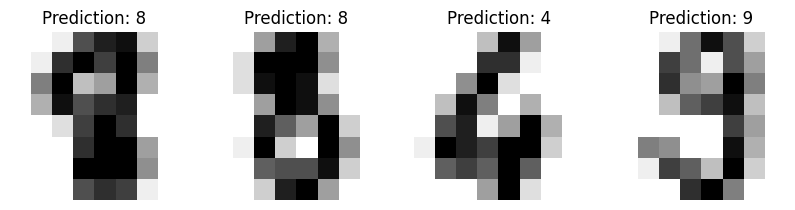

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")


In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


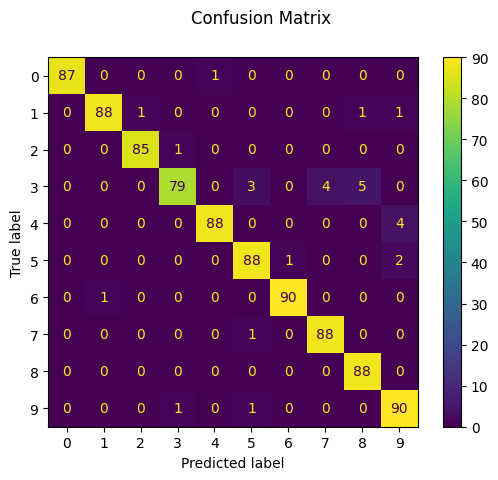

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)



Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


